In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### Exercise 2

Consider the following problem. There are a set of people (p1; p2; p3; p4) and a set of books (b1; b2; b3; b4). Each person is interested in a subset of books, specifically:

- p1 -> (b1; b2); 
- p2 -> (b2; b3); 
- p3 -> (b1; b4); 
- p4 -> (b1; b2; b4):

**(a) Represent the interest pattern by using a simple bipartite graph.**

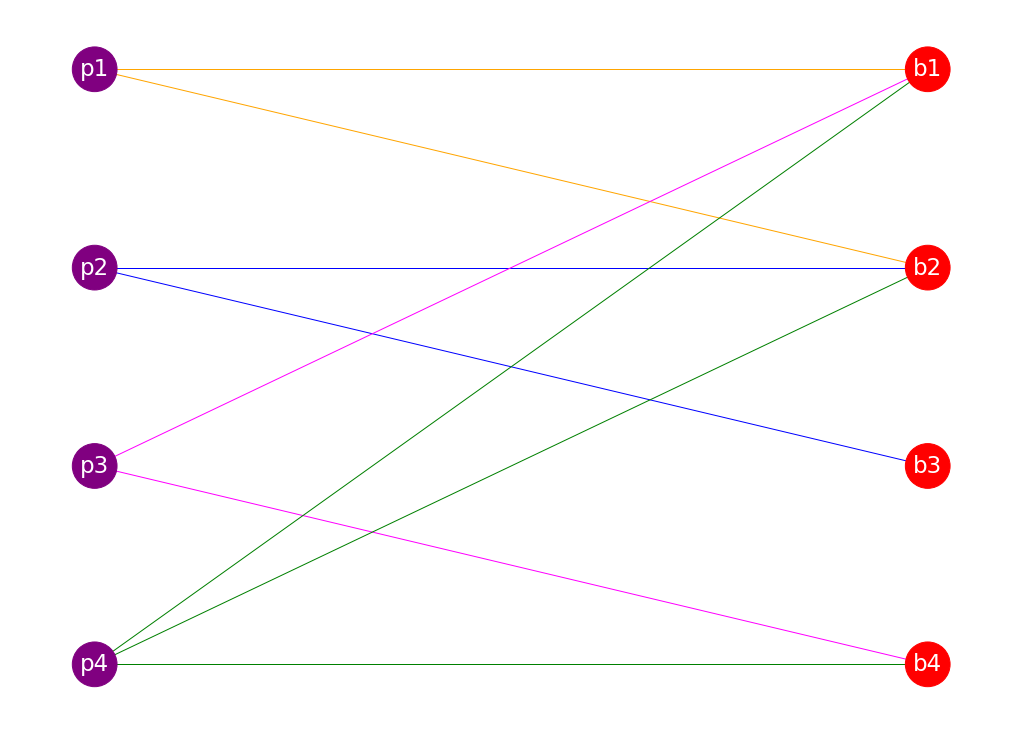

In [65]:
fig = plt.figure(1, figsize=(14,10))
G = nx.Graph()

G.add_node('p1')
G.add_node('p2')
G.add_node('p3')
G.add_node('p4')
G.add_node('b1')
G.add_node('b2')
G.add_node('b3')
G.add_node('b4')

G.add_edges_from([('p1', 'b1'), ('p1', 'b2'), 
                  ('p2', 'b2'), ('p2', 'b3'),
                  ('p3', 'b1'), ('p3', 'b4'),
                  ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')])

pos = {'p1':[0,4], 'b1':[1,4], 'b2':[1,3], 'p2':[0,3], 'b3':[1,2], 'p3':[0,2], 'b4':[1,1], 'p4':[0,1]}

# define node colors
node_colors = ['purple', 'purple','purple','purple','red','red','red','red',]

# define edge colors
G['p1']['b1']['color'] = 'orange'
G['p1']['b2']['color'] = 'orange'
G['p2']['b2']['color'] = 'blue'
G['p2']['b3']['color'] = 'blue'
G['p3']['b1']['color'] = 'magenta'
G['p3']['b4']['color'] = 'magenta'
G['p4']['b1']['color'] = 'green'
G['p4']['b2']['color'] = 'green'
G['p4']['b4']['color'] = 'green'

edge_colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, font_color='white', node_color=node_colors, 
           edge_color=edge_colors, node_size=2000, font_size=23)

**(b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching.**

A perfect matching (both for $V_0$ and $V_1$) can exist only if $|V_0|=|V_1|$. In our case $|V_0|=|V_1|$=4. So a perfect matching potentially could exists.


To check the existence of a perfect matching we consider the **Hall's marriage Theorem**: 

for a simple bipartite graph $G = (V,E)$ and $V_0 \subseteq V$, there exists a $V_0$-perfect matching in $G$ if and only if

$$
  |\mathcal{N}_{\mathcal{s}}| \ge |\mathcal{S}| \quad \forall \mathcal{S} \subseteq V_0,
$$

where:
- $ |\mathcal{N}_{\mathcal{s}}|$ is the number of neighbors of the subset.
- $ |\mathcal{S}|$ is the number of nodes in the subset $V_0$

Basically we look at all the possible subsets of nodes in the partition $V_0$ and the corresponding number of neighbors in the partition $V_1$.

It exists a perfect matching if and only if the cardinality of the neighbors is greater or equal than the cardinality of the corresponding subset. So if you find a subset S connected to a number of neighbors smaller than the nodes in the subset you cannot find a perfect matching.

We can exploit the analogy between the perfect matching and the maximal flow in order to find the perfect matching by means of the Ford-Fulkerson algorithm.

Starting from a undirected bipartite graph, we define the following directed new graph:
- We add one source "o" connected with every node $n \in V_0$ with link of capacity 1
- We add one destination "d" connected with every node $n \in V_1$ with link of capacity 1
- Every undirected link between $V_0$ and $V_1$ is substituted with a directed link of capacity 1

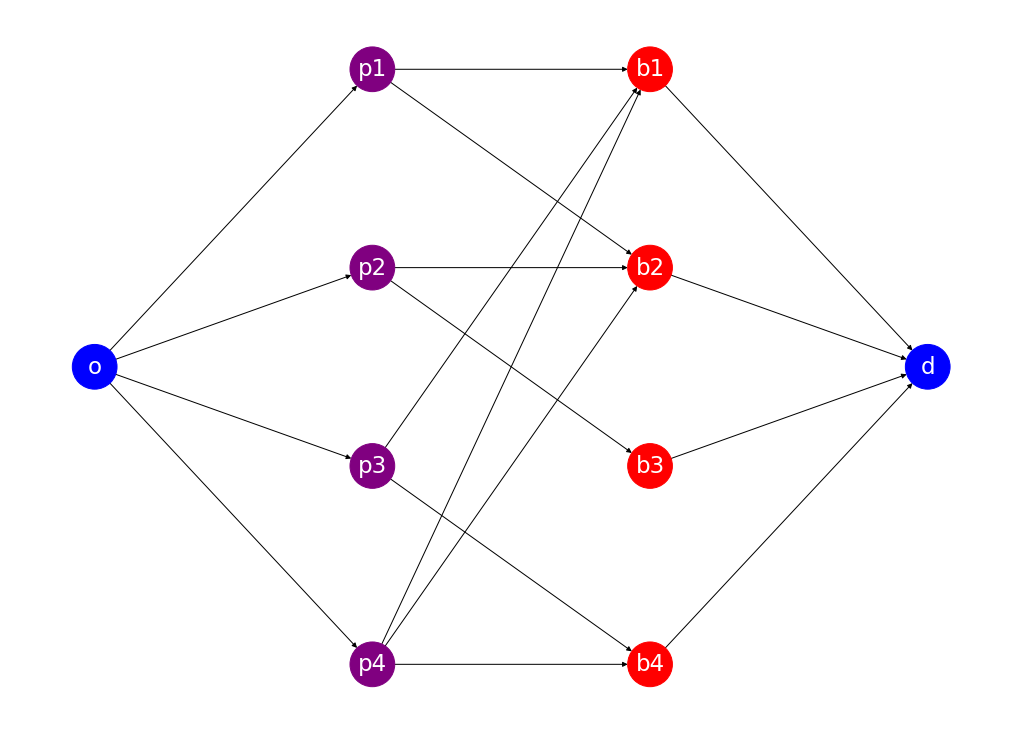

In [64]:
fig = plt.figure(1, figsize=(14,10))

G1 = nx.DiGraph()

G1.add_node('o')
G1.add_node('p1')
G1.add_node('p2')
G1.add_node('p3')
G1.add_node('p4')
G1.add_node('b1')
G1.add_node('b2')
G1.add_node('b3')
G1.add_node('b4')
G1.add_node('d')

G1.add_edges_from([('o', 'p1') , ('o', 'p2') , ('o', 'p3'), ('o', 'p4'),
                   ('p1', 'b1'), ('p1', 'b2'), 
                   ('p2', 'b2'), ('p2', 'b3'),
                   ('p3', 'b1'), ('p3', 'b4'),
                   ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4'),
                   ('b1', 'd') , ('b2', 'd') , ('b3', 'd') , ('b4', 'd')], capacity=1)

pos1 = {'o':[-1, 2.5], 'p1':[0,4], 'b1':[1,4], 'b2':[1,3],'p2':[0,3], 
        'b3':[1,2], 'p3':[0,2], 'b4':[1,1], 'p4':[0,1], 'd':[2, 2.5]}

# define node colors
G1_node_colors = ['blue', 'purple', 'purple','purple','purple','red','red','red','red', 'blue']

# define edge colors
for u,v in G1.edges():
    G1[u][v]['color'] = 'black'

G1_edge_colors = [G1[u][v]['color'] for u,v in G1.edges()]

nx.draw(G1, pos1, with_labels = True, font_color='white', node_color=G1_node_colors, 
        edge_color='black', node_size=2000, font_size=23)

A $V_0$-perfect matching on the bipartite graph exists if and only if there exists a in the new directed network a flow which is greater or equal than the cardinality of the partition $V_0$. We can now exploit Ford-Fulkerson algorithm to find the maximum flow that can be sent in $G1$.

In [50]:
print("maximum flow: ", nx.algorithms.flow.maximum_flow(G1, 'o', 'd'))
print("minimum cut", nx.algorithms.flow.minimum_cut(G1, 'o', 'd'))

maximum flow:  (4, {'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 'p1': {'b1': 0, 'b2': 1}, 'p2': {'b2': 0, 'b3': 1}, 'p3': {'b1': 1, 'b4': 0}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 'b1': {'d': 1}, 'b2': {'d': 1}, 'b3': {'d': 1}, 'b4': {'d': 1}, 'd': {}})
minimum cut (4, ({'b1', 'p3', 'b4', 'o', 'p1', 'b3', 'b2', 'p2', 'p4'}, {'d'}))


A perfect match exists and it is the following:

- p1 -> b1
- p2 -> b3
- p3 -> b1
- p4 -> b4

If a maximum flow with throughput $|V_0|$ exists, then every node in $V_0$ has incoming and outcoming flow $1$, since all the edges have unitary capacity. 

**(c) Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2; 3; 2; 2), and there is no constraint on the number of books that each person can take. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.**

In this case instead to solve this problem we need to change the capacity corresponding to the edges of the network.

First we inspect the minimum cut defined in the previous problem, which is the 4 and corresponds to the cut with only the destination in one partition and all the rest of the nodes in the other partition.

We do not have constraints on the number of books that a person can take, so we can assign to the edge the number of books in which they are interested.

To the intermediate links between the partition we assigns 1 as capacity since each user is interested in buying one copy of a specific book. 

The edges from the books to the destination will have as capacity (2,3,2,2), which are the available copies.

We define the depicted network now.

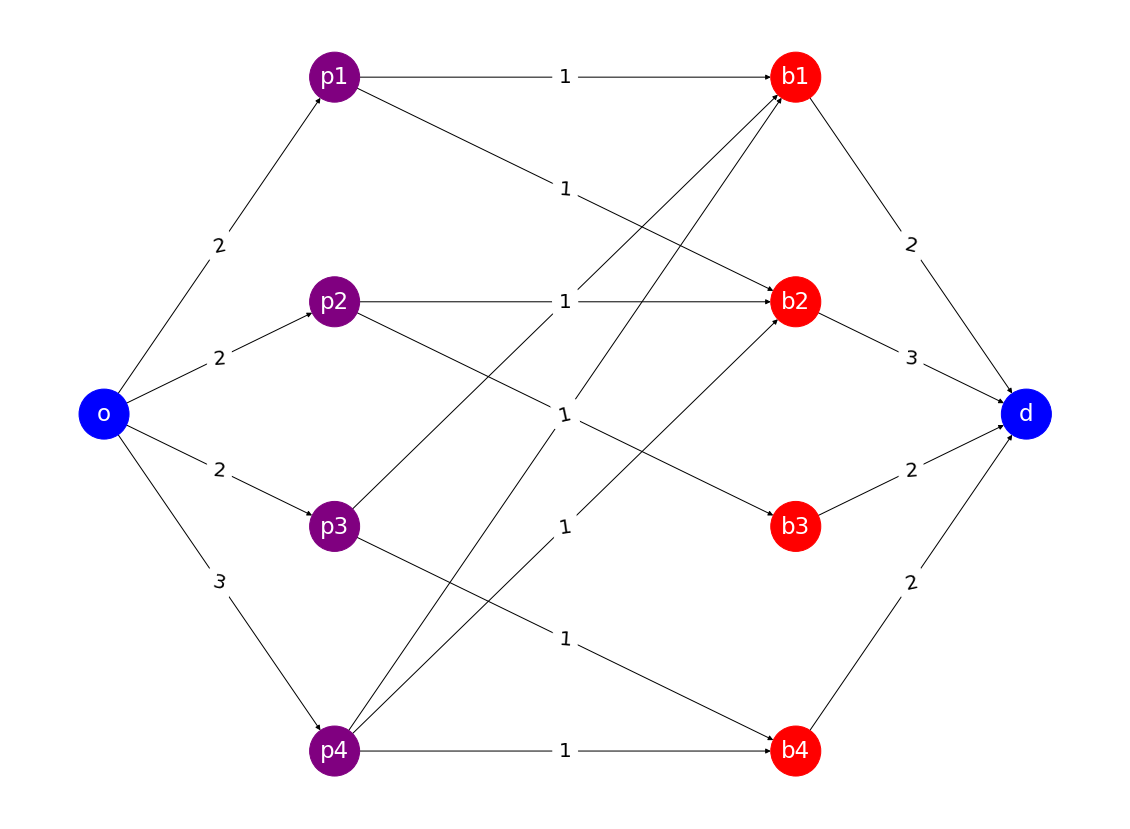

In [83]:
fig = plt.figure(1, figsize=(20,15))

G2 = nx.DiGraph()

G2.add_node('o')
G2.add_node('p1')
G2.add_node('p2')
G2.add_node('p3')
G2.add_node('p4')
G2.add_node('b1')
G2.add_node('b2')
G2.add_node('b3')
G2.add_node('b4')
G2.add_node('d')

G2.add_edges_from([('o', 'p1'), ('o', 'p2'), ('o', 'p3'),
                   ('b1', 'd'), ('b3', 'd') , ('b4', 'd')], capacity=2)
G2.add_edges_from([('o', 'p4'), ('b2', 'd')], capacity=3)
G2.add_edges_from([('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), 
                   ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'),
                   ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')], capacity=1)

pos2 = {'o':[-10, 2.5], 'p1':[-5,4], 'b1':[5,4], 'b2':[5,3],'p2':[-5,3], 
        'b3':[5,2], 'p3':[-5,2], 'b4':[5,1], 'p4':[-5,1], 'd':[10, 2.5]}

nx.draw_networkx_edge_labels(G2,pos2,edge_labels={
                                                 ('o', 'p1'):G2['o']['p1']['capacity'], 
                                                 ('o', 'p2'):G2['o']['p2']['capacity'],
                                                 ('o', 'p3'):G2['o']['p3']['capacity'],
                                                 ('o', 'p4'):G2['o']['p4']['capacity'],
                                                 
                                                 ('p1', 'b1'):G2['p1']['b1']['capacity'],
                                                 ('p2', 'b3'):G2['p2']['b3']['capacity'],
                                                 ('p3', 'b1'):G2['p3']['b1']['capacity'],
                                                 ('p3', 'b4'):G2['p3']['b4']['capacity'],
                                                 
                                                 ('p4', 'b1'):G2['p4']['b1']['capacity'],
                                                 ('p4', 'b4'):G2['p4']['b4']['capacity'],
                                                 ('b1', 'd'):G2['b1']['d']['capacity'],
                                                 ('b3', 'd'):G2['b3']['d']['capacity'], 
                                                 ('b4', 'd'):G2['b4']['d']['capacity'],
                                                 
                                                 ('p1', 'b2'):G2['p1']['b2']['capacity'],                                               
                                                 ('p2', 'b2'):G2['p2']['b2']['capacity'],
                                                 ('p4', 'b2'):G2['p4']['b2']['capacity'],
                                                 ('b2', 'd'):G2['b2']['d']['capacity']                                                
                                                },
                             font_size=20, font_color='black') 



# define node colors
G2_node_colors = ['blue', 'purple', 'purple','purple','purple','red','red','red','red', 'blue']

# define edge colors
for u,v in G2.edges():
    G2[u][v]['color'] = 'black'

G2_edge_colors = [G2[u][v]['color'] for u,v in G2.edges()]

nx.draw(G2, pos2, with_labels = True, font_color='white', node_color=G2_node_colors, 
        edge_color='black', node_size=2500, font_size=23)

In [73]:
print("maximum flow: ", nx.algorithms.flow.maximum_flow(G2, 'o', 'd'))
print("minimum cut", nx.algorithms.flow.minimum_cut(G2, 'o', 'd'))

maximum flow:  (8, {'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'p1': {'b1': 0, 'b2': 1}, 'p2': {'b2': 1, 'b3': 1}, 'p3': {'b1': 1, 'b4': 1}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'b3': {'d': 1}, 'b4': {'d': 2}, 'd': {}})
minimum cut (8, ({'b1', 'p3', 'b4', 'o', 'p1', 'b2', 'p2', 'p4'}, {'d', 'b3'}))


The maximum number of books of interest that can be assigned are 8, which corresponds to the maximum throughput.
The minimum cut is defined by the partion with {b3, d} from one side and all the other nodes on the other side.

**(d) Suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?**

We can immediately observe that for the book 3 we have two copies available, but only 1 person interested in buying it. On the contrary we have only 2 copies available for book 1 but 3 customers interested in buying it. So the library should return to the editor 1 copy of book 3 and get 1 more copy of book 1, in this way we maximize the number of assigned books passing from 8 to 9.

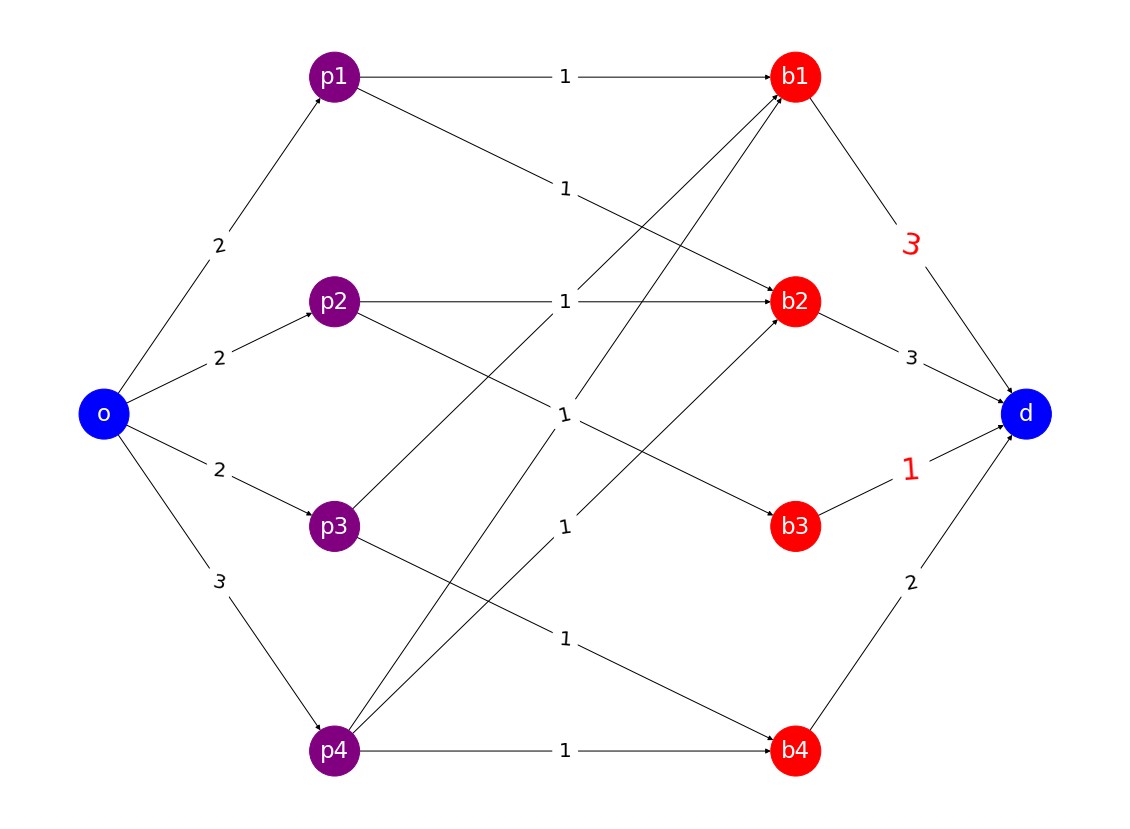

In [82]:
fig = plt.figure(1, figsize=(20,15))

G3 = nx.DiGraph()

G3.add_node('o')
G3.add_node('p1')
G3.add_node('p2')
G3.add_node('p3')
G3.add_node('p4')
G3.add_node('b1')
G3.add_node('b2')
G3.add_node('b3')
G3.add_node('b4')
G3.add_node('d')

G3.add_edges_from([('o', 'p1'), ('o', 'p2'), ('o', 'p3'), ('b4', 'd')], capacity=2)
G3.add_edges_from([('o', 'p4'), ('b2', 'd'), ('b1', 'd')], capacity=3)
G3.add_edges_from([('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), 
                   ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'),
                   ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4'), ('b3', 'd')], capacity=1)

pos3 = {'o':[-10, 2.5], 'p1':[-5,4], 'b1':[5,4], 'b2':[5,3],'p2':[-5,3], 
        'b3':[5,2], 'p3':[-5,2], 'b4':[5,1], 'p4':[-5,1], 'd':[10, 2.5]}

nx.draw_networkx_edge_labels(G2,pos2,edge_labels={
                                                 ('o', 'p1'):G3['o']['p1']['capacity'], 
                                                 ('o', 'p2'):G3['o']['p2']['capacity'],
                                                 ('o', 'p3'):G3['o']['p3']['capacity'],
                                                 ('o', 'p4'):G3['o']['p4']['capacity'],
                                                 
                                                 ('p1', 'b1'):G3['p1']['b1']['capacity'],
                                                 ('p2', 'b3'):G3['p2']['b3']['capacity'],
                                                 ('p3', 'b1'):G3['p3']['b1']['capacity'],
                                                 ('p3', 'b4'):G3['p3']['b4']['capacity'],
                                                 
                                                 ('p4', 'b1'):G3['p4']['b1']['capacity'],
                                                 ('p4', 'b4'):G3['p4']['b4']['capacity'],
                                                 ('b4', 'd'):G3['b4']['d']['capacity'],
                                                 
                                                 ('p1', 'b2'):G3['p1']['b2']['capacity'],                                               
                                                 ('p2', 'b2'):G3['p2']['b2']['capacity'],
                                                 ('p4', 'b2'):G3['p4']['b2']['capacity'],
                                                 ('b2', 'd'):G3['b2']['d']['capacity']                                                
                                                },
                             font_size=20, font_color='black') 

nx.draw_networkx_edge_labels(G2,pos2,edge_labels={

                                                 ('b1', 'd'):G3['b1']['d']['capacity'],
                                                 ('b3', 'd'):G3['b3']['d']['capacity']                                              
                                                },
                             font_size=30, font_color='red') 



# define node colors
G3_node_colors = ['blue', 'purple', 'purple','purple','purple','red','red','red','red', 'blue']

# define edge colors
for u,v in G3.edges():
    G3[u][v]['color'] = 'black'

G3_edge_colors = [G3[u][v]['color'] for u,v in G3.edges()]

nx.draw(G3, pos2, with_labels = True, font_color='white', node_color=G3_node_colors, 
        edge_color='black', node_size=2500, font_size=23)

In [77]:
print("maximum flow: ", nx.algorithms.flow.maximum_flow(G3, 'o', 'd'))
print("minimum cut", nx.algorithms.flow.minimum_cut(G3, 'o', 'd'))

maximum flow:  (9, {'o': {'p1': 2, 'p2': 2, 'p3': 2, 'p4': 3}, 'p1': {'b1': 1, 'b2': 1}, 'p2': {'b2': 1, 'b3': 1}, 'p3': {'b1': 1, 'b4': 1}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'b1': {'d': 3}, 'b2': {'d': 3}, 'b3': {'d': 1}, 'b4': {'d': 2}, 'd': {}})
minimum cut (9, ({'b1', 'p3', 'b4', 'o', 'p1', 'b3', 'b2', 'p2', 'p4'}, {'d'}))
